In [1]:
import random
import torch
import numpy as np
from sklearn.datasets import load_diabetes
# X y y ya son arrays de numpy
X, y = load_diabetes(return_X_y=True)

m = X.shape[0]
unos = np.ones((m, 1))
X = np.append(unos, X, axis=1)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print(X.shape, y.shape)

torch.Size([442, 11]) torch.Size([442])


In [2]:
n = 30
# learning rate
alpha = torch.tensor(0.001, dtype=torch.float32)
# weights matrix
theta = torch.rand((X.shape[1], 1), dtype=torch.float32, requires_grad=True)
print(theta, theta.shape)
cost_history = []

tensor([[0.5133],
        [0.5138],
        [0.6075],
        [0.7303],
        [0.3226],
        [0.7161],
        [0.2078],
        [0.7002],
        [0.3593],
        [0.4325],
        [0.6306]], requires_grad=True) torch.Size([11, 1])


In [3]:
# entrenamiento usando torch autograd
for i in range(n):
    #forward pass
    # regresion lineal
    z = torch.matmul(X, theta)
    # costo
    # (1/(2*m))*np.sum(np.square(hyp(x, w, b) - y))
    J = (1/(2 * m)) * torch.sum(torch.square(z - y))
    cost_history.append(J.item())
    # print(i, J)
    # backward pass
    # compute gradients
    J.backward()
    # print(f'dtheta: {dtheta}')
    with torch.no_grad():
        theta -= alpha * theta.grad 
    # reset gradients
    theta.grad.zero_()

print('terminado')
print(f'costo inicial: {cost_history[0]}\ncosto final: {cost_history[-1]}')

terminado
costo inicial: 6391004.5
costo final: 1310507.375


In [4]:
cost_history

[6391004.5,
 2892391.25,
 1803049.75,
 1463867.75,
 1358258.625,
 1325375.75,
 1315137.25,
 1311949.375,
 1310956.625,
 1310647.5,
 1310551.25,
 1310521.25,
 1310512.0,
 1310509.0,
 1310508.125,
 1310507.75,
 1310507.75,
 1310507.625,
 1310507.625,
 1310507.625,
 1310507.625,
 1310507.5,
 1310507.5,
 1310507.625,
 1310507.5,
 1310507.5,
 1310507.5,
 1310507.375,
 1310507.375,
 1310507.375]

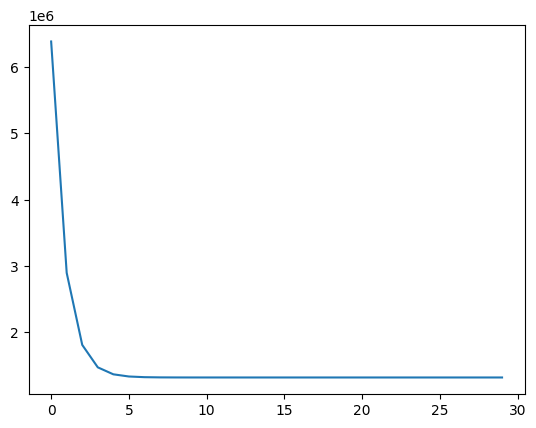

In [7]:
import matplotlib.pyplot as plt
it = list(range(n))
plt.plot(it, cost_history)
plt.show()